<a href="https://colab.research.google.com/github/ghazalna/Falcon9-Landing-Predictor/blob/main/Decision_Tree_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **The Data**

In [2]:
from google.colab import files

In [3]:
uploaded=files.upload()

Saving preprocessed_dataset.csv to preprocessed_dataset.csv


In [4]:
import pandas as pd


In [5]:
df=pd.read_csv('preprocessed_dataset.csv')

In [6]:
df

,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Class,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,6123.547647,1,0,0,0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,525.000000,1,0,0,0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,677.000000,1,0,0,0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,500.000000,1,0,0,0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3170.000000,1,0,0,0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,15600.000000,2,1,1,1,5.0,12,1,0,0,...,0,0,0,0,0,0,0,0,1,0
86,15600.000000,3,1,1,1,5.0,13,1,0,0,...,0,0,0,0,0,0,1,0,0,0
87,15600.000000,6,1,1,1,5.0,12,1,0,0,...,0,0,0,1,0,0,0,0,0,0
88,15600.000000,3,1,1,1,5.0,12,1,0,0,...,0,0,0,0,0,0,0,0,1,0


### **Exploratory Data Analysis**

### **Missing Data**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 88 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   PayloadMass                          90 non-null     float64
 1   Flights                              90 non-null     int64  
 2   GridFins                             90 non-null     int64  
 3   Reused                               90 non-null     int64  
 4   Legs                                 90 non-null     int64  
 5   Block                                90 non-null     float64
 6   ReusedCount                          90 non-null     int64  
 7   Class                                90 non-null     int64  
 8   Orbit_ES-L1                          90 non-null     int64  
 9   Orbit_GEO                            90 non-null     int64  
 10  Orbit_GTO                            90 non-null     int64  
 11  Orbit_HEO                         

In [8]:
from sklearn import preprocessing

In [9]:
transform = preprocessing.StandardScaler()

### **Machine Learning Prediction**

### **Decision Tree Classifier with GridSearchCV**

In [15]:
X= df.drop('Class', axis=1)
y= df['Class']

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import numpy as np

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20 ,random_state=101)

In [56]:
y_test.shape

(18,)

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [82]:
np.random.seed(42)
tree=DecisionTreeClassifier(random_state=19)

In [83]:
from sklearn.model_selection import GridSearchCV

In [84]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

In [85]:
tree_cv =GridSearchCV(tree , parameters, cv = 10)
tree_cv.fit(X_train, y_train)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_feat

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=19),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [86]:
print("tuned hyperparameters (best parameters): ", tree_cv.best_params_)
print("accuracy: ", tree_cv.best_score_)

tuned hyperparameters (best parameters):  {'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}
accuracy:  0.9142857142857143


In [87]:
np.random.seed(20)

In [88]:
prediction_3 = tree_cv.predict(X_test)

In [89]:
prediction_3

array([0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1])

In [90]:
from sklearn.metrics import confusion_matrix
confusion_matrix (y_test,prediction_3)

array([[ 4,  3],
       [ 0, 11]])

In [91]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, prediction_3, normalize=False)
print("Accuracy (raw count): ", accuracy)

Accuracy (raw count):  15


In [92]:
accuracy_normalized = accuracy_score(y_test, prediction_3, normalize=True)
print("Accuracy (normalized): ", accuracy_normalized)

Accuracy (normalized):  0.8333333333333334


In [93]:
from sklearn.metrics import classification_report
print (classification_report(y_test,prediction_3))

              precision    recall  f1-score   support

           0       1.00      0.57      0.73         7
           1       0.79      1.00      0.88        11

    accuracy                           0.83        18
   macro avg       0.89      0.79      0.80        18
weighted avg       0.87      0.83      0.82        18



In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

In [95]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

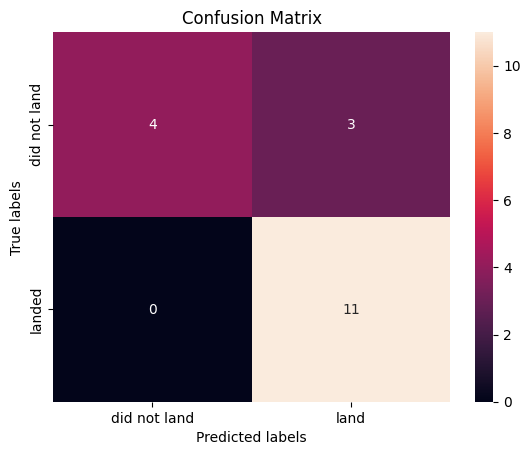

In [96]:
yhat=tree_cv.predict(X_test)
plot_confusion_matrix(y_test,yhat)